In [72]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from data import get_train_data, get_valid_data, get_test_data, v2i
from model import Encoder, Decoder, Autoencoder
from model import show_history

N = 100

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prepare the data

In [2]:
x_train = get_train_data(raw=False)
x_valid = get_valid_data(raw=False)
x_test = get_test_data(raw=False)

# Create and train the model

In [100]:
m = Autoencoder(N)
m.summary()
m.layers[0].summary()
m.layers[1].summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Sequential)         (None, 100)               2182692   
_________________________________________________________________
decoder (Sequential)         (None, 32, 32, 3)         310272    
Total params: 2,492,964
Trainable params: 2,492,964
Non-trainable params: 0
_________________________________________________________________
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_conv1 (Conv2D)       (None, 30, 30, 32)        896       
_________________________________________________________________
encoder_conv2 (Conv2D)       (None, 28, 28, 32)        9248      
_________________________________________________________________
encoder_conv3 (Conv2D)       (None, 26, 26, 32)        9248      
____________________________

In [ ]:
m = Autoencoder(N)
m.compile(optimizer='adam', loss ='mean_squared_error')
history = m.fit(x=x_train,
                y=x_train,
                validation_data=(x_valid, x_valid), 
                epochs=20)
show_history(history)

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 3s 271us/sample - loss: 0.0363 - val_loss: 0.0248
Epoch 2/20
10000/10000 [==============================] - 2s 214us/sample - loss: 0.0221 - val_loss: 0.0199
Epoch 3/20
10000/10000 [==============================] - 2s 214us/sample - loss: 0.0183 - val_loss: 0.0172
Epoch 4/20
 8992/10000 [=========================>....] - ETA: 0s - loss: 0.0161

# Response of the decoder on onehot input

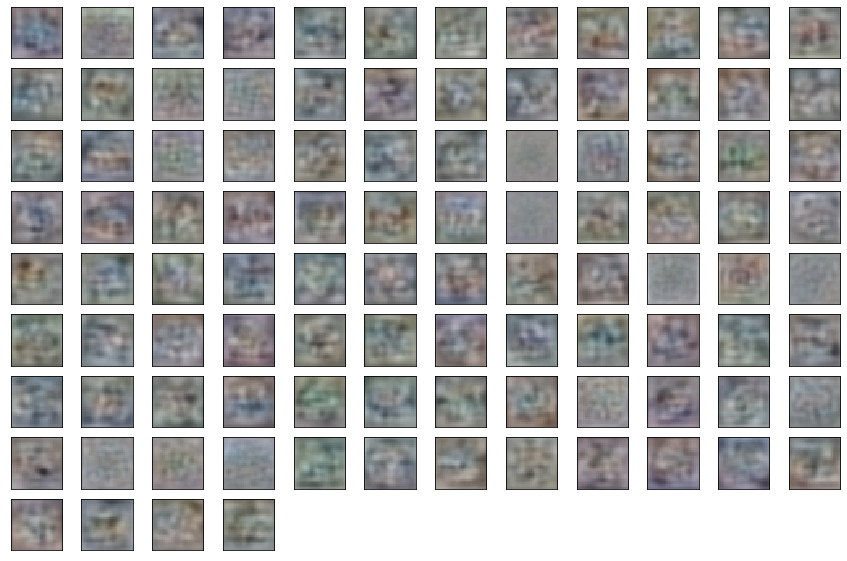

In [94]:
encoder, decoder = m.layers

plt.figure(figsize=(15, 10))
plt.axis('off')

onehot = np.diag(np.ones(N))
images = decoder.predict(onehot)
for i in range(N):
    plt.subplot(9, 12, i+1)
    fig = plt.imshow(images[i])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [90]:
encoder.predict(x_train[:10])

array([[0.59096295, 0.93498826, 0.30030972, 0.4905011 , 0.60858095,
        0.23586503, 0.42848852, 0.9020948 , 0.442847  , 0.6200334 ,
        0.23583302, 0.40608534, 0.06575939, 0.17091233, 0.8523709 ,
        0.5315361 , 0.551997  , 0.13318503, 0.46685907, 0.45822012,
        0.85259557, 0.12069109, 0.14250591, 0.79871106, 0.3062145 ,
        0.66234094, 0.33400732, 0.71201956, 0.7470137 , 0.45125914,
        0.40556377, 0.4365276 , 0.66281414, 0.4248975 , 0.6228651 ,
        0.297568  , 0.67043686, 0.7718218 , 0.8299005 , 0.77809393,
        0.44159296, 0.4409019 , 0.5263718 , 0.3068257 , 0.738729  ,
        0.1590862 , 0.28677619, 0.33522978, 0.6885593 , 0.35790566,
        0.43416765, 0.56249505, 0.5699635 , 0.38879684, 0.5606642 ,
        0.24781108, 0.3821802 , 0.10927492, 0.6917553 , 0.35275388,
        0.7158997 , 0.54084873, 0.8225616 , 0.39970928, 0.38205752,
        0.70162565, 0.4338435 , 0.44265044, 0.9435482 , 0.5591464 ,
        0.4915579 , 0.411574  , 0.39184433, 0.50

# Original image and it's encoded and decoded representation

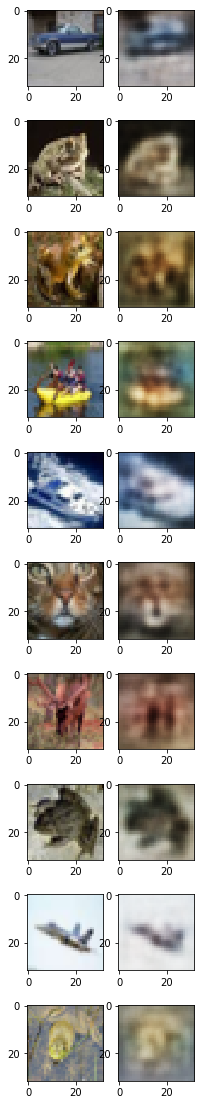

In [95]:
x = x_valid
res = m.predict(x)
plt.figure(figsize=(3, 20))
for idx in range(10):
    plt.subplot(10, 2, 2 * idx + 1)
    plt.imshow(x[idx])
    plt.subplot(10, 2, 2 * idx + 2)
    plt.imshow(res[idx])